In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV


In [3]:
#import data
data = pd.read_csv('heart.csv')
data


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
#data info
data.info()
#There are no nulls in the data

#show percentage of data with heart disease and without
data["HeartDisease"].value_counts(normalize=True)
#Good balance of with and without head disease 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64

In [5]:
#show count, null, and unique values per column
pd.DataFrame({'count': data.shape[0], 
              'nulls': data.isnull().sum(), 
              'nulls%': data.isnull().mean() * 100, 
              'cardinality': data.nunique(),
             })

,count,nulls,nulls%,cardinality
Age,918,0,0.0,50
Sex,918,0,0.0,2
ChestPainType,918,0,0.0,4
RestingBP,918,0,0.0,67
Cholesterol,918,0,0.0,222
FastingBS,918,0,0.0,2
RestingECG,918,0,0.0,3
MaxHR,918,0,0.0,119
ExerciseAngina,918,0,0.0,2
Oldpeak,918,0,0.0,53


In [6]:
data.describe(include=np.number)
#Note that RestingBP and Cholesterol min value is 0. These data should be cleaned.

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
data.describe(include = object)

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [8]:
#clean-up data
data_clean = data.loc[(data['Cholesterol'] != 0) & (data['RestingBP'] != 0)]
data_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 746 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             746 non-null    int64  
 1   Sex             746 non-null    object 
 2   ChestPainType   746 non-null    object 
 3   RestingBP       746 non-null    int64  
 4   Cholesterol     746 non-null    int64  
 5   FastingBS       746 non-null    int64  
 6   RestingECG      746 non-null    object 
 7   MaxHR           746 non-null    int64  
 8   ExerciseAngina  746 non-null    object 
 9   Oldpeak         746 non-null    float64
 10  ST_Slope        746 non-null    object 
 11  HeartDisease    746 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 75.8+ KB


In [11]:
y = data_clean['HeartDisease']
X = data_clean.drop('HeartDisease', axis=1)

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import shap


In [14]:
# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
#baseline - 'Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBP', 'RestingECG'
#stress test - 'MaxHR', 'Oldpeak', 'ExerciseAngina', 'ST_Slope'

#Age and Sex are in all three subsets

#Just baseline
X_train1 = X_train.drop(columns = ['MaxHR', 'Oldpeak', 'ExerciseAngina', 'ST_Slope'])       

#Just stress test data
X_train2 = X_train.drop(columns = ['ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG'])   

#All features
X_train3 = X_train

In [42]:
X_test1 = X_test.drop(columns = ['MaxHR', 'Oldpeak', 'ExerciseAngina', 'ST_Slope'])     
X_test2 = X_test.drop(columns = ['ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG'])   
X_test3 = X_test

In [43]:
num_features1 = ['Age', 'RestingBP', 'Cholesterol']
cat_features1 = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG']   

num_features2 = ['Age', 'MaxHR', 'Oldpeak']
cat_features2 = ['Sex', 'ExerciseAngina', 'ST_Slope']   

num_features3 = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
cat_features3 = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']   


In [44]:

# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features1),
        ('cat', OneHotEncoder(), cat_features1)
    ],
    remainder='passthrough'
)

# Define models and parameters for grid search
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier(max_iter=2000)
}

params = {
    'Logistic Regression': {'classifier__C': [0.1, 1, 10, 100]},
    'Random Forest': {'classifier__n_estimators': [10, 50, 100], 'classifier__max_depth': [None, 10, 20, 30]},
    'Neural Network': {'classifier__hidden_layer_sizes': [(50,), (100,), (100, 100)], 'classifier__alpha': [0.0001, 0.001, 0.01]} 
}

best_model = None
best_params = None
best_score = 0
best_model_name = ""

# Perform grid search
for model_name in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', models[model_name])
    ])
    
    grid = GridSearchCV(estimator=pipeline, param_grid=params[model_name], cv=5, n_jobs=-1, scoring='accuracy')
    grid.fit(X_train1, y_train)
    
    score = grid.best_score_
    if score > best_score:
        best_score = score
        best_model = grid.best_estimator_
        best_params = grid.best_params_
        best_model_name = model_name

# Test best model on the test set
y_pred = best_model.predict(X_test1)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Best Model: {best_model_name}")
print(f"Best Parameters: {best_params}")
print(f"Validation Accuracy: {best_score:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged ye

Best Model: Logistic Regression
Best Parameters: {'classifier__C': 0.1}
Validation Accuracy: 0.7550
Test Accuracy: 0.8333


In [45]:
# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features2),
        ('cat', OneHotEncoder(), cat_features2)
    ],
    remainder='passthrough'
)

# Define models and parameters for grid search
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier(max_iter=2000)
}

params = {
    'Logistic Regression': {'classifier__C': [0.1, 1, 10, 100]},
    'Random Forest': {'classifier__n_estimators': [10, 50, 100], 'classifier__max_depth': [None, 10, 20, 30]},
    'Neural Network': {'classifier__hidden_layer_sizes': [(50,), (100,), (100, 100)], 'classifier__alpha': [0.0001, 0.001, 0.01]} 
}

best_model = None
best_params = None
best_score = 0
best_model_name = ""

# Perform grid search
for model_name in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', models[model_name])
    ])
    
    grid = GridSearchCV(estimator=pipeline, param_grid=params[model_name], cv=5, n_jobs=-1, scoring='accuracy')
    grid.fit(X_train2, y_train)
    
    score = grid.best_score_
    if score > best_score:
        best_score = score
        best_model = grid.best_estimator_
        best_params = grid.best_params_
        best_model_name = model_name

# Test best model on the test set
y_pred = best_model.predict(X_test2)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Best Model: {best_model_name}")
print(f"Best Parameters: {best_params}")
print(f"Validation Accuracy: {best_score:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Best Model: Random Forest
Best Parameters: {'classifier__max_depth': 20, 'classifier__n_estimators': 50}
Validation Accuracy: 0.8390
Test Accuracy: 0.8533


In [47]:
# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features3),
        ('cat', OneHotEncoder(), cat_features3)
    ],
    remainder='passthrough'
)

# Define models and parameters for grid search
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier(max_iter=2000)
}

params = {
    'Logistic Regression': {'classifier__C': [0.1, 1, 10, 100]},
    'Random Forest': {'classifier__n_estimators': [10, 50, 100], 'classifier__max_depth': [None, 10, 20, 30]},
    'Neural Network': {'classifier__hidden_layer_sizes': [(50,), (100,), (100, 100)], 'classifier__alpha': [0.0001, 0.001, 0.01]} 
}

best_model = None
best_params = None
best_score = 0
best_model_name = ""

# Perform grid search
for model_name in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', models[model_name])
    ])
    
    grid = GridSearchCV(estimator=pipeline, param_grid=params[model_name], cv=5, n_jobs=-1, scoring='accuracy')
    grid.fit(X_train3, y_train)
    
    score = grid.best_score_
    if score > best_score:
        best_score = score
        best_model = grid.best_estimator_
        best_params = grid.best_params_
        best_model_name = model_name

# Test best model on the test set
y_pred = best_model.predict(X_test3)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Best Model: {best_model_name}")
print(f"Best Parameters: {best_params}")
print(f"Validation Accuracy: {best_score:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Best Model: Random Forest
Best Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 50}
Validation Accuracy: 0.8675
Test Accuracy: 0.9067


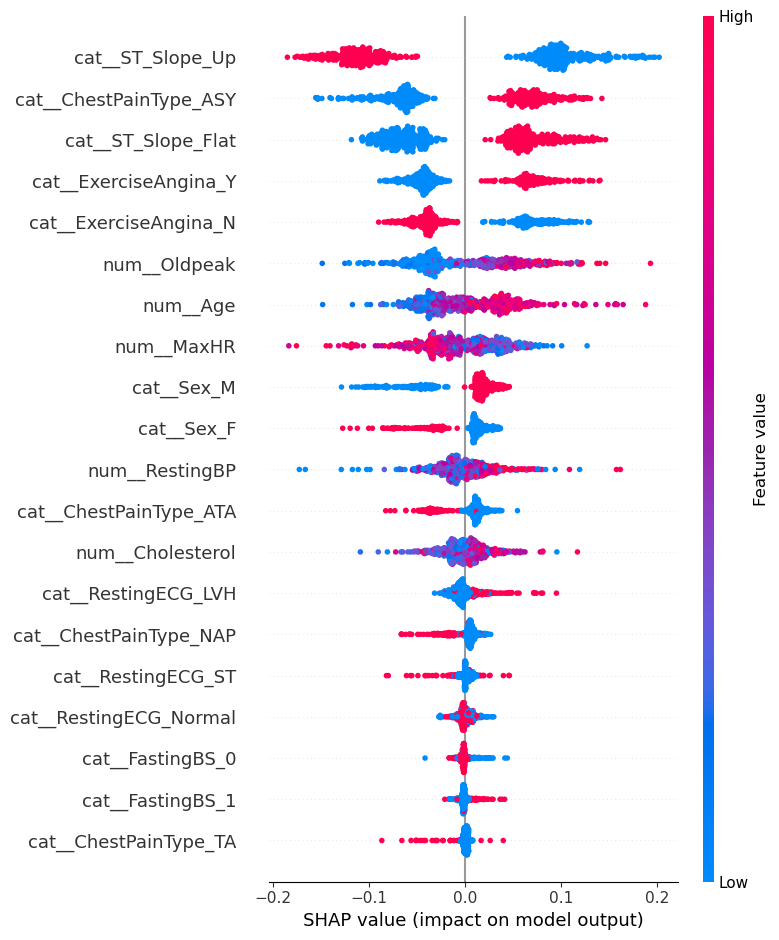

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define preprocessing steps
# OneHotEncoder for categorical data and StandardScaler for numerical data
num_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
cat_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']   

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
        ('num', StandardScaler(), num_features)
    ]
)

# Step 4: Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Step 5: Train the pipeline
pipeline.fit(X_train, y_train)

# Step 6: Apply SHAP for feature importance
# Extract the Random Forest model from the pipeline
model = pipeline.named_steps['classifier']

# Get transformed feature names
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Use SHAP to explain predictions
explainer = shap.TreeExplainer(model)
X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)
shap_values = explainer.shap_values(X_train_transformed)

# Step 7: Visualize feature importance
shap.summary_plot(shap_values[1], X_train_transformed, feature_names=feature_names)  # Class 1





In [26]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'ChestPainType',
                                                   'FastingBS', 'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'MaxHR',
                                                   'Oldpeak'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [32]:
feature_names = X_test.columns
print("Feature Names:", feature_names)

Feature Names: Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')


In [29]:
importances = model.feature_importances_

# Print the feature importances
print("Feature Importances:", importances)

Feature Importances: [0.01971634 0.02403623 0.07428655 0.02149338 0.01184715 0.00880868
 0.00848799 0.00782621 0.0166426  0.01205281 0.01102673 0.07473507
 0.07983555 0.00603454 0.08031255 0.14019439 0.07996225 0.07214136
 0.06870155 0.09675599 0.08510207]


IndexError: index 15 is out of bounds for axis 0 with size 11

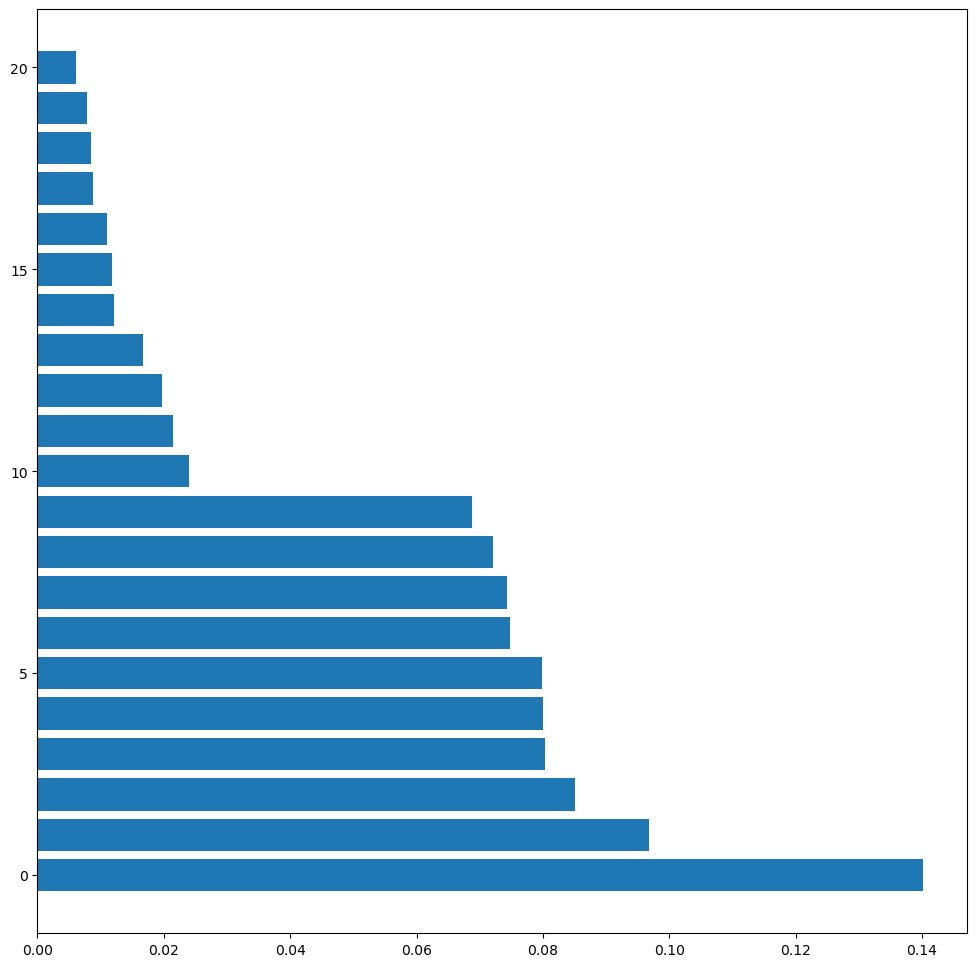

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Get the feature names (if using a dataset with named features)
feature_names = [f'Feature {i}' for i in range(X.shape[1])]

# Sort the importances in descending order
sorted_idx = np.argsort(importances)[::-1]

# Create the plot
plt.figure(figsize=(12, 12))
plt.barh(range(len(importances)), importances[sorted_idx], align='center')
plt.yticks(range(len(importances)), np.array(feature_names)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()